# Introduction

The field of generative AI models has witnessed remarkable developments in recent years. From 2014 to 2017, the VAE and GAN models revolutionized the generative AI landscape. During this period, significant modifications were made to the GAN model architecture, including DCGAN (2015), loss function (Wasserstein GAN, 2017), and training process (ProGAN, 2017). Furthermore, GANs were successfully applied to new domains, such as image-to-image translation (pix2pix, 2016 and CycleGAN, 2017) and music generation (MuseGAN, 2017).

The Transformer era (2018-2019) was marked by the emergence of GPT, a decoder-only Transformer that rapidly gained traction within the AI community. The subsequent years witnessed the development of increasingly larger language models, including GPT-2 (2018, 1.5B parameters) and T5 (2019, 11B parameters).

From 2020 to 2022, the Big Model Era ushered in the merging of ideas from various generative modeling families. For example, VQ-GAN (2020) incorporated the GAN discriminator into the VQ-VAE architecture, and the Vision Transformer (2020) demonstrated the possibility of training a Transformer to operate over images. In 2020, DDPM and DDIM models were introduced, laying the foundations for future large image generation models. This period also saw the release of GPT-3 (2020), a 175B parameter Transformer, and other large language models, such as Gopher (2021), Chinchilla (2022), LaMDA (2022), PaLM (2022), OPT (2022), GPT-J (2021), GPT-NeoX (2022), and BLOOM (2022). Additionally, ChatGPT (2022), a web application and API wrapper based on the latest version of GPT from OpenAI, was developed to facilitate natural conversations between users and the AI.

The multimodal model trend was established with DALL.E (OpenAI), a text-to-image model based on a discrete VAE, followed by DALL.E 2 (2022), which updated the generative part of the model to use a diffusion model. Google also released text-to-image models, including Imagen (2022), which uses Transformer and diffusion models, and Parti (2022), which employs Transformers and a ViT-VQGAN model.

Another significant advancement was Latent Diffusion (2021), a diffusion model trained within the latent space of an autoencoder. This technique powers the Stable Diffusion model, released by Stability AI, and its code and model weights are open-source, enabling anyone to run the model on their hardware.

As we move into 2023, the future of generative AI models is poised for even more exciting developments.

We can summarize this evolution into:

🎇 2014-2017: The VAE and GAN era

📝 2018-2019 The Transformer Era

🤖 2020-2022: The Big Model Era

🎉 2023 - Exciting Times Ahead


In [6]:
import pandas as pd
import requests
import plotly.graph_objs as go
from io import StringIO
import plotly.express as px


# Download the CSV file
url = "https://raw.githubusercontent.com/davidADSP/Generative_Deep_Learning_2nd_Edition/main/docs/history.csv"
response = requests.get(url)
data = response.text

# Read the CSV using Pandas
df = pd.read_csv(StringIO(data))
df['Paper Date'] = pd.to_datetime(df['Paper Date'], format='%d/%m/%Y')
df = df.sort_values('Paper Date')

# Create a color scale based on the model types
color_scale = px.colors.qualitative.Plotly[:len(df['type'].unique())]
type_color_map = {model_type: color for model_type, color in zip(df['type'].unique(), color_scale)}

# Add a 'color' column to the DataFrame based on the model types
df['color'] = df['type'].map(type_color_map)

# Create the scatter plot
fig = go.Figure()

# Add the points to the plot
for _, row in df.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Paper Date']],
        y=[row['Name']],
        mode='markers',
        marker=dict(color=row['color'], size=10),
        hovertemplate=(
            f"<b>Model:</b> {row['Name']}<br>"
            f"<b>Publication Date:</b> {row['Paper Date'].strftime('%Y-%m-%d')}<br>"
            f"<b>Paper Link:</b>'{row['paper']}"
        ),
        name=row['type'],
        legendgroup=row['type'],
        showlegend=row['type'] not in [trace['name'] for trace in fig.data]
    ))

# Add shaded rectangles for the periods
periods = [
    ('2014-01-01', '2017-12-31', 'The VAE and GAN era', 'gold'),
    ('2018-01-01', '2019-12-31', 'The Transformer Era', 'cyan'),
    ('2020-01-01', '2022-12-31', 'The Big Model Era', 'lime'),
    ('2023-01-01', '2023-12-31', 'Exciting Times Ahead', 'magenta')
]

for start_date, end_date, label, color in periods:
    fig.add_shape(type='rect',
                  xref='x',
                  yref='paper',
                  x0=start_date,
                  x1=end_date,
                  y0=-0.5,
                  y1=len(df['Name']) + 0.5,
                  fillcolor=color,
                  opacity=0.1,
                  layer='below',
                  line=dict(width=0))
    
    fig.add_annotation(
        x=end_date,
        y=len(df['Name']) + 1,
        text=label,
        showarrow=False,
        xanchor='right',
        yanchor='bottom',
        font=dict(size=12, color='black'),
        xshift=0,
        yshift=0,
        valign='bottom',
        textangle=-90,
        bgcolor="rgba(255, 255, 255, 0.6)",
        borderpad=2,
        opacity=0.8
    )


# Adjust the limits, titles, and labels of the plot
fig.update_layout(
    title='A history of the most important generative AI models',
    xaxis=dict(title='Publication Date', tickformat='%Y', range=[df['Paper Date'].min() - pd.DateOffset(months=6), pd.Timestamp('2024-02-01')]),
    yaxis=dict(title='Models'),
    hovermode='closest',
    legend=dict(title='Model Types'),
    height=800,
    margin=dict(l=100)
)

# Show the plot
fig.show()

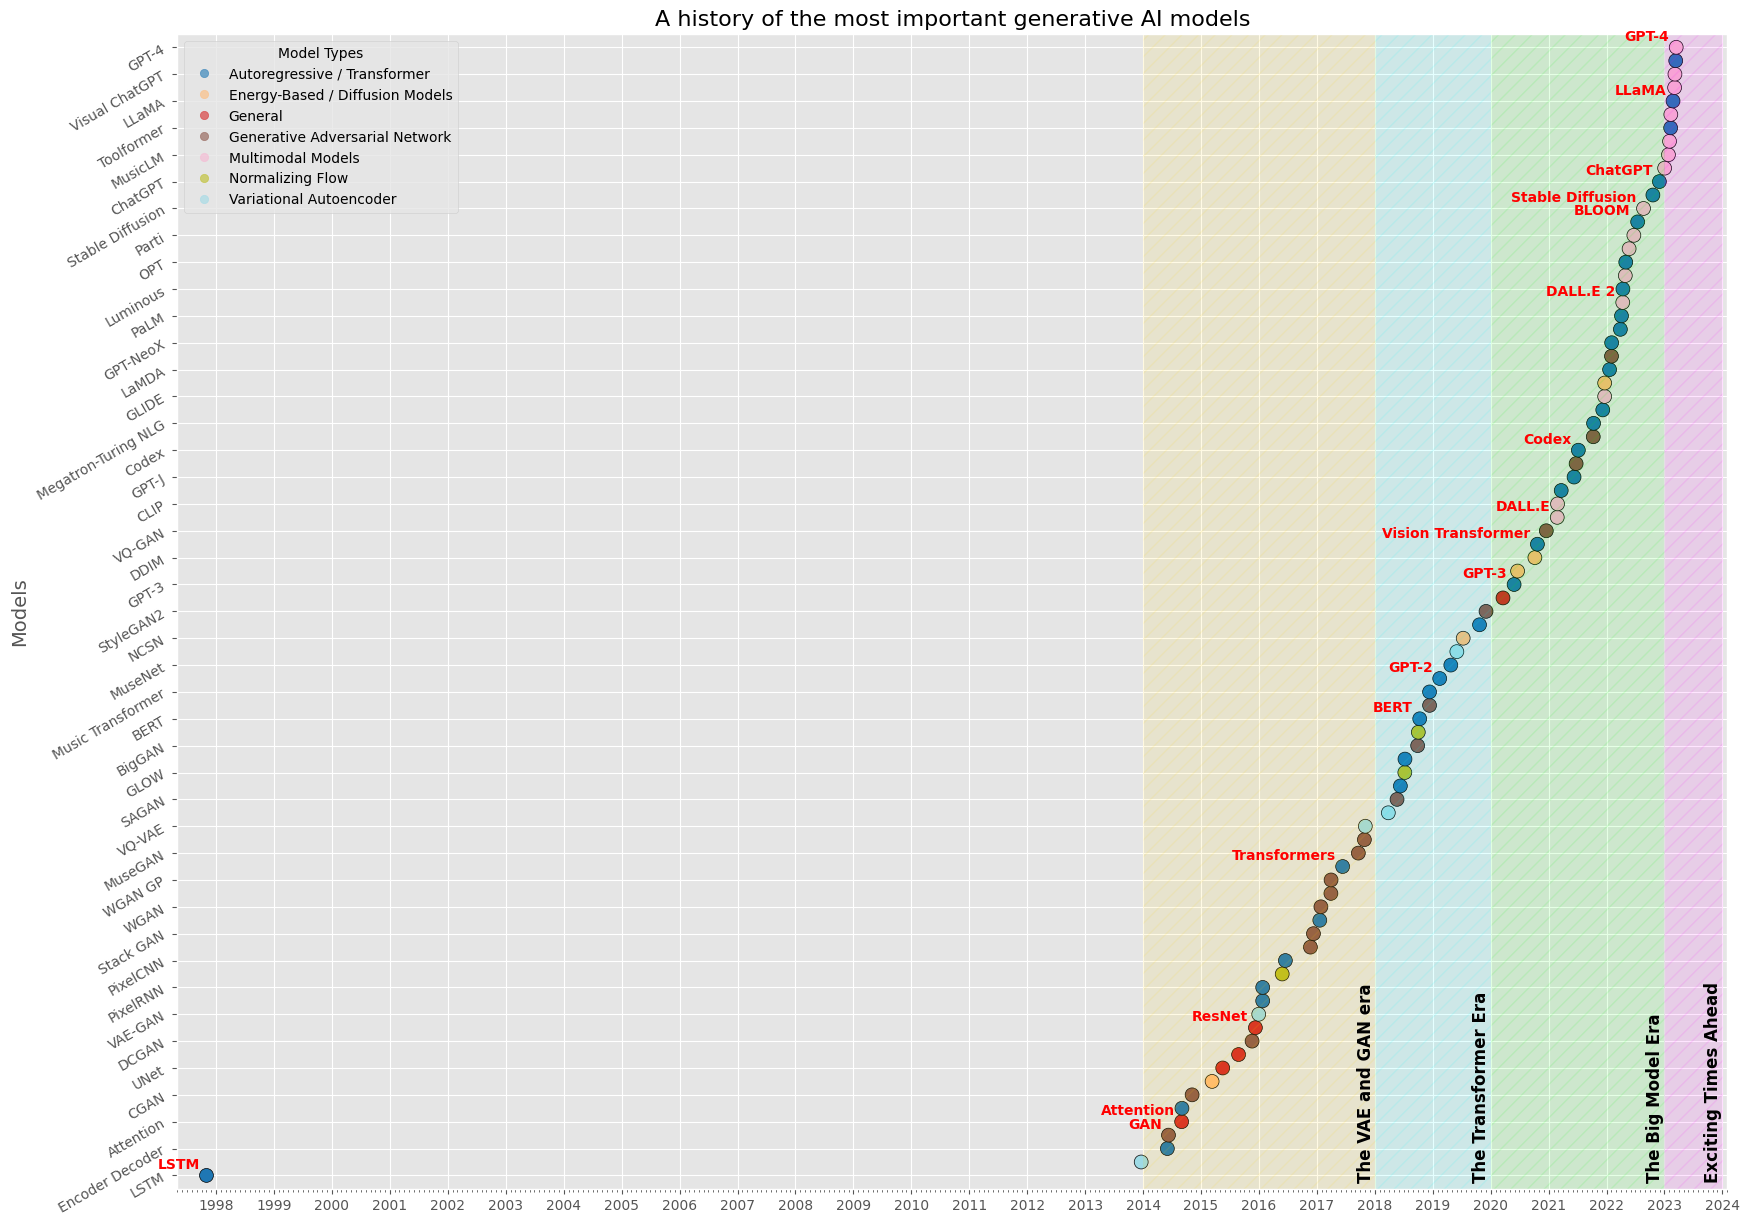

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO
import requests

# Download the CSV file
url = "https://raw.githubusercontent.com/davidADSP/Generative_Deep_Learning_2nd_Edition/main/docs/history.csv"
response = requests.get(url)
data = response.text

# Read the CSV using Pandas
df = pd.read_csv(StringIO(data))
df['Paper Date'] = pd.to_datetime(df['Paper Date'], format='%d/%m/%Y')
df = df.sort_values('Paper Date')

# Set the chart style
plt.style.use('ggplot')

highlighted_models = [
    "LSTM", "GAN", "Attention", "ResNet", "Transformers", "BERT", "GPT-2", "GPT-3", "Vision Transformer",
    "DALL.E", "Codex", "DALL.E 2", "BLOOM", "Stable Diffusion", "ChatGPT", "LLaMA", "GPT-4"
]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(20, 15))

fig.set_facecolor('none')

colors = df['type'].astype('category').cat.codes
scatter = ax.scatter(df['Paper Date'], df['Name'], c=colors, cmap='tab20', edgecolors='k', s=100)

# Adjust the format and position of the dates on the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust the chart limits, titles, and labels
ax.set_xlim(df['Paper Date'].min() - pd.DateOffset(months=6), pd.Timestamp('2024-02-01'))
ax.set_ylim(-1, len(df['Name']))
ax.set_title('A history of the most important generative AI models', fontsize=16)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Models', fontsize=14)

# Increase the distance between labels on the y-axis
ax.set_yticks(range(0, len(df['Name']), 2))  # Display every second label to reduce clutter
ax.set_yticklabels(df['Name'][::2], fontsize=10, rotation=30, ha='right')  # Rotate labels for readability

# Highlight selected models
for idx, row in df.iterrows():
    if row['Name'] in highlighted_models:
        ax.annotate(row['Name'], (row['Paper Date'], row['Name']),
                    textcoords="offset points", xytext=(-5, 5), ha='right', fontsize=10, color='red', fontweight='bold')

# Create the legend based on the colors
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = df['type'].astype('category').cat.categories
ax.legend(handles, legend_labels, loc='upper left', title='Model Types')

# Add shaded rectangles for the periods
periods = [
    ('2014-01-01', '2017-12-31', 'The VAE and GAN era'),
    ('2018-01-01', '2019-12-31', 'The Transformer Era'),
    ('2020-01-01', '2022-12-31', 'The Big Model Era'),
    ('2023-01-01', '2023-12-31', 'Exciting Times Ahead')
]

colors = ['gold', 'cyan', 'lime', 'magenta']


for i, (start_date, end_date, label) in enumerate(periods):
    ax.axvspan(pd.Timestamp(start_date), pd.Timestamp(end_date), alpha=0.1, color=colors[i], hatch='//')
    ax.annotate(label,
                xy=(pd.Timestamp(end_date), -0.5),
                xycoords='data',
                xytext=(0, 0),
                textcoords='offset points',
                fontsize=12,
                fontweight='bold',
                ha='right',
                va='bottom',
                rotation='vertical')

# Save the chart in high resolution
plt.savefig('generativeAItimeline.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the chart
plt.show()

# Midjourney

Moving forward, we'll delve into the capabilities of [Midjourney](https://www.midjourney.com/app/), the second model of the three we'll be examining in this course. Although it can be slightly more intricate to navigate compared to [DALL-E 2](https://openai.com/dall-e-2/), it remains fairly lenient when it comes to balancing image quality with prompt quality.

**Midjourney**'s strength lies in its ability to produce visually striking images with an artistic flair, such as those resembling paintings, digital art, or videogame concept art. If you're the type who values creativity and artistic expression, then **Midjourney** is definitely worth exploring.


**Reference**: 
- https://www.midlibrary.io/
- https://docs.midjourney.com/docs

## Setting up Midjourney

**Midjourney** boasts a distinct user interface, requiring usage not through a conventional website, but via a chatbot. In order to initiate use of **Midjourney**, a [Discord](https://discord.com/) account is necessary, which must be linked to the user's **Midjourney** account. 


There are two options available for acquiring a **Midjourney** account:

1. **Free Account**: This option permits the generation of up to ``25 images for free`` using Midjourney within any of the 20 ``#general`` or ``#newbies`` channels located within Midjourney's Discord.
2. **Paid Plan**: Once the free image generation credits have been exhausted, a subscription to **Midjourney** is required. 

> For users on a paid plan, a notable advantage is the ability to privately converse with the ``MidjourneyBot``, without the necessity of voicing messages aloud in a group chat, affording greater privacy.

It may seem somewhat convoluted and unconventional to generate images using the Discord chat, but rest assured, once you have established your account, you will gain access to an extraordinary tool!




### 🟢 Before you move on

📝 Prior to proceeding, **please attend to your homework** by following these steps:

1. Register or authenticate your credentials on [Discord](https://discord.com/).
2. Navigate to [Midjourney](https://www.midjourney.com/) and access their Discord server.
3. Ensure that you have acknowledged and agreed to abide by the server's regulations on Discord in order to gain access to the various channels and post content therein.

## Let's ``/imagine`` some pictures

Since you have already established your connection with Midjourney, let us proceed to the practical aspects.

Talking in a chat is a necessary step for generating images with Midjourney. 

> To make an image, you'll need to use the **``/imagine``** command,

which works by following a simple two-step process. First, you'll need to enter the command in the chat, and then specify what you want the image to be. This easy-to-use method allows you to create the images you need with ease, making it an essential tool for anyone looking to create professional-looking graphics.

It is now time to begin the assigned task. To commence, kindly proceed to one of the numerous **``#general``** or **``#newbies``**  chats within the [Midjourney's Discord server](https://discord.com/invite/midjourney). Once there, please input the **``/imagine``** command (ensuring to include the slash symbol at the beginning), followed by a space and a corresponding prompt. Upon completion of these steps, press the enter key, and the image generation process will commence within the chat interface.

To conduct an assessment and draw a comparison between the outcomes generated by [DALL-E 2](https://openai.com/dall-e-2/) and Midjourney's prompt, let us proceed to test the **DALL-E 2** prompt from the previous module. It is important to note that in order to do so, the **``/imagine``** command must be first initiated, followed by a space bar, and subsequently inputting the prompt.

> ``/imagine`` + ``a hyper realistic photo of a beautiful house where walls are made of windows in mid-century modern style at sunset inside of a forest and full of trees and plants``



<p align="center">
  <img src="https://drive.google.com/uc?id=1FFTSU9SGETHlVbywcBsYua3AOXPt_fcZ" alt="Difusion" width="600" />
  <br />
  <em>The output of the prompt above</em>.</p>


<p align="center">
  <img src="https://drive.google.com/uc?id=1Wp6LkfC_uvVacHZHYeA9urjAT5sN8yvL" alt="Difusion" width="600" />
  <br />
  <em>The figure 1 upscaled</em>.</p>


The progress achieved thus far is commendable! It is apparent that **Midjourney**'s image creation approach leans towards artistic creativity, as opposed to **DALL-E**'s. In line with its default settings, **Midjourney** generates four distinct images per prompt. As you observe the generated images, you may notice the availability of two buttons located under each image, labeled "U" and "V". 

> The "U" button refers to "Upscale", while the "V" button represents "Variation"."

### 🟢 Before you move on

Your objective now is to experiment with Midjourney's prompt generation, and to explore the potential of image variations and upscaling. You may visit [PromptHero](https://prompthero.com/midjourney-prompts) for high-quality Midjourney prompts, allowing you to generate a range of diverse images that can be further customized according to your preferences.

## Blending images together + using img2img in Midjourney

The **``/blend``** command is an exceptional tool designed to facilitate the seamless amalgamation of 2 to 5 images, resulting in the generation of a unique visual output. By meticulously analyzing the distinct concepts and aesthetics present in each image, this command coalesces them into an innovative and original composition.

The **``/blend``** command bears similarities to the utilization of multiple image prompts with the **``/imagine``** function. However, it offers a user interface specifically optimized for facile use on mobile devices, thereby enhancing the user experience.

It is important to note that the **``/blend``** command is limited to a maximum of 5 images. Should the need arise to incorporate more than 5 images in a prompt, users are advised to employ the image prompts feature in conjunction with the **``/imagine``** command.

Moreover, the **``/blend``** command does not possess the capability to work with text prompts. In order to combine text and image prompts, users are encouraged to utilize the image prompts and text features with the **``/imagine``** command.

Please be advised that this remarkable feature is compatible with version 4 of Midjourney and subsequent versions. To activate version 4, one may add the algorithm modifier (— v 4) to each prompt or, for optimal convenience, enable v4 directly from the **``/settings``** panel.

We trust that the **``/blend``** command will greatly augment your creative capabilities and provide an unparalleled dimension to your artistic pursuits.


<p align="center">
  <img src="https://drive.google.com/uc?id=1JeFQOVzSmlk5UejnhYey46vSr_Rteuuk" alt="Difusion" width="600" />
  <br />
  <em>Lampião blended from the Night King (Games of Thrones)</em>.</p>

**References**:
- https://docs.midjourney.com/docs/blend
- https://www.midlibrary.io/midguide/how-to-blend-images-together-with-midjourney-ai

### 🟢 Before you move on

It is now your turn to create an image generation that embodies a fusion of two or more other images while taking into account various scenarios, including but not limited to, constructions, individuals, attire, vehicles, and the like. I implore you to approach this task with utmost seriousness and commitment, leveraging your creativity and technical skills to produce a stunning and compelling outcome that aligns with your vision and objectives. Your ability to deliver a high-quality image that meets the specified requirements will not only demonstrate your proficiency in the field but also showcase your potential to contribute significantly to the advancement of the art. Thus, I encourage you to devote your best effort and immerse yourself fully in this challenge.

## Multi Prompts and Prompt weights


### Multi Prompts



The Midjourney Bot offers the unique capability of independently considering two or more distinct concepts by using the **``::``** separator. The separation of prompts enables the assignment of relative importance to different parts of a prompt.



#### Multi-Prompt Basics



By adding a **double colon** ``::`` to a prompt, the Midjourney Bot will consider each part of the prompt separately. For example, the prompt "pine apple" will generate images of appetizing pineapples since all words are considered together. However, when the prompt is separated into two parts, "pine:: apples," each concept is considered independently, resulting in an image of an apple and a pine. This feature offers a versatile and powerful tool for generating highly specific images that meet the desired criteria.

<p align="center">
  <img src="https://drive.google.com/uc?id=1Ebc2hH7Mte2wKCOuD1wrHVJO65zfH2jk" alt="Difusion" width="600" />
  <br />
  <em>Multi-promping using the pineapple example</em>.</p>

### Prompt Weights

Prompt weights offer a creative way to adjust the significance of various components in a prompt, ensuring that specific aspects are emphasized according to your needs. By employing a double colon **``"::"``** to separate parts of a prompt and adding a number right after it, you can effectively allocate the level of importance to that particular part.

Consider the given example: the prompt **``pine:: apple``** led to a depiction of a pine that is apple. However, by modifying the prompt to **``pine::2 apple``** the word ``pine`` becomes twice as crucial as the word ``apple`` resulting in an image of an exceptionally pine!

> For model versions 1, 2, and 3, it is essential to note that only whole numbers are accepted as weights. In contrast, model version 4 provides more flexibility, allowing the use of decimal places for weights. If weights are not specified, they default to a value of 1, ensuring equal importance for all parts of the prompt.

<p align="center">
  <img src="https://drive.google.com/uc?id=1J7eYxjlOUUGLm4pCex6LHNp_Mj_pfvT3" alt="Difusion" width="600" />
  <br />
  <em>Multi-promping using more pine than apples and more appples than pine</em>.</p>

<p align="center">
  <img src="https://drive.google.com/uc?id=1IDCSep22-i73et3EeywEMsD5zrNRWPlI" alt="Difusion" width="800" />
  <br />
  <em>Multi-promping using dogs and stained glass</em>.</p>


### 🟢 Before you move on

We kindly invite you to explore the link provided on multi-prompts, where you will find invaluable information to enhance your understanding of Negative Prompt Weights. As you delve into this topic, we encourage you to create a variety of examples that demonstrate the versatility of this technique. For instance, consider scenarios such as:

a) Comparing images that feature vehicles with tires alongside those without tires, effectively showcasing the impact of Negative Prompt Weights on visual elements.
b) Examining images of landscapes that depict rivers, contrasted with those that are devoid of rivers, thus highlighting the power of Negative Prompt Weights in altering image content.
c) Crafting fruit salad compositions with or without specific fruits, allowing you to experiment with the influence of Negative Prompt Weights on a culinary level.

Please follow the link below to access the comprehensive guide on multi-prompts, and embark on this exciting journey to harness the potential of Negative Prompt Weights:

https://docs.midjourney.com/docs/multi-prompts

## Using the seed to gain control over Midjourney

As we continue our exploration into the fascinating realm of generative AI, it becomes increasingly apparent that precision is paramount. Refining our control over the generation process will undoubtedly elevate the quality of our outcomes.

Midjourney's performance is indeed impressive, even when provided with brief prompts. However, one may notice that the resulting output can occasionally be somewhat generic. To illustrate this point, let us consider the prompts **``photography of a woman``** or **``photography of a dog``** and observe the generated content:


<p align="center">
  <img src="https://drive.google.com/uc?id=1b4fj0CosWyCV20lEu4Zqmw88yGYCgbVs" alt="Difusion" width="800" />
  <br />
  <em>Midjourney's quality is amazing even with short prompts, but the downside is the results are too generic. There is one simple way to increase your control over the process: fixing the seed number.</em>.</p>


### Keep the seed, modify the rest

As we delve further into the intricacies of image generation, the concept of a seed becomes crucial to understanding the process. A seed is a number responsible for producing the initial random noise employed at the onset of image generation.

Minor alterations in the seed number result in substantial changes to the initial random noise, which subsequently leads to dramatically different images.

Fortunately, there is no need to generate the seed number manually, as it is automatically created when left unspecified.

The key insight here is that by fixing the seed, one can generate reproducible images, thus enabling experimentation with other parameters and prompt variations while maintaining consistency.

By default, Midjourney assigns a random seed number to each generated image and variation. We invite you to try the following experiment using a [Midjourney prompt of your choosing](https://prompthero.com/midjourney-prompts):

- Generate images as usual, allowing the seed to remain random.
- Fix the seed number by appending ``--seed 2023`` to the end of the prompt.

Observe the differences between the two sets of results. Images generated in the second experiment should display greater coherence and similarity amongst themselves.

<p align="center">
  <img src="https://drive.google.com/uc?id=1gfiR6X1ythMhQ1JmthXmh8mv4M0CeMd0" alt="Difusion" width="800" />
  <br />
  <em>Images without and with seed</em>.</p>

💡 Suggestion: In order to determine the seed utilized for generating an image in Midjourney, simply follow these steps to add a new "envelope" reaction to the message. Firstly, right-click the image whose seed you would like to reveal. Next, select ``Add Reaction`` > ``View More``, and input ``:envelope:`` before pressing enter. Upon sending the reaction, Midjourney will respond with a new message containing the seed number.

<p align="center">
  <img src="https://drive.google.com/uc?id=1QgGoZ5Mkdbvko5EQyzgzEfr9_DVahnsw" alt="Difusion" width="800" />
  <br />
  <em>Discovering the seed used to generate the image</em>.</p>


In the next illustration, we maintained the same seed while altering the prompt so that the subject appears smiling rather than serious. Although fixing the seed does not render the two images identical, it offers greater control by eliminating unpredictability. Once you identify a favorable seed for a specific prompt, retain it and begin refining the prompt. Consequently, the likelihood of generating an exceptional image is heightened.

Discovering an optimal seed primarily relies on a combination of fortune and perseverance.

In the aforementioned example, the original image on the left was generated using the following prompt:

> ``photograph close up portrait 62-year-old tough decorated general, CLEAN SHAVEN, serious, stoic cinematic 4k epic detailed 4k epic detailed photograph shot on kodak detailed bokeh cinematic hbo dark moody --seed 1258522731``

Then we introduced the words ``smiling`` and ``happy`` while keeping the seed the same:

> ``photograph close up portrait 62-year-old`` **``smiling``** ``tough decorated general, CLEAN SHAVEN,`` **``happy``**, ``stoic cinematic 4k epic detailed 4k epic detailed photograph shot on kodak detailed bokeh cinematic hbo dark moody --seed 1258522731``

<p align="center">
  <img src="https://drive.google.com/uc?id=1KvciOT6DtXZX8nuX8OD_VyXVb8uoXDD3" alt="Difusion" width="800" />
  <br />
  <em>Same seed but with smile and happy</em>.</p>

>👀 Note: When images are generated using identical seeds and prompts (assuming all other parameters remain consistent), the resulting images will be indistinguishable. It is the seed that contributes variability to the prompt. The reason a single prompt yields different images is because, by default, each generation employs a distinct seed number. In Midjourney, each of the four generated images utilizes a different ``slice`` of the seed to offer increased diversity, even while maintaining a fixed seed. Consequently, the generated images are not all identical.





💡 Tip: A complete list of all parameters and prompt customization options supported by Midjourney can be found in their official documentation at the following link: https://docs.midjourney.com/docs/parameter-list

### 🟢 Before you move on

🌟 Brilliant Ideas:
- Consider designing a captivating coloring book utilizing powerful tools like [Midjourney](https://docs.midjourney.com/docs/parameter-list), [Canva](https://www.canva.com/), and [HeroSpark](https://herospark.com/herospark-midias). For inspiration, check out this engaging [video tutorial](https://www.youtube.com/watch?v=XRceSWq8JBQ).
- Delve into the fascinating world of character aging with Midjourney by exploring this intriguing [Twitter post](https://twitter.com/nickfloats/status/1636605977662312449).
- Discover the cutting-edge command **``/describe``**(version --v 5) and draw insightful comparisons with the [CLIP Interrogator](https://huggingface.co/spaces/fffiloni/CLIP-Interrogator-2), which offers a similar solution. For a comprehensive understanding, watch this captivating [video explanation](https://www.youtube.com/watch?v=aELuWN3TB4U).


# Stable Diffusion

## Presenting the Epochal Breakthrough of Stable Diffusion


I would like to introduce the third and final generative AI model that we shall scrutinize with great attention: [Stable Diffusion](https://github.com/Stability-AI/stablediffusion).

In light of its exceptional significance, we shall dedicate substantial time to this remarkable model. Indeed, **Stable Diffusion** is unequivocally the most consequential of the three models under discussion.

While [DALL-E 2](https://openai.com/dall-e-2/) enabled us to gain a rudimentary understanding of the subject matter and [Midjourney](https://www.midjourney.com/app/) afforded us greater agency in the image generation process, it is in **Stable Diffusion** where the real innovation lies.

I invite you to indulge in a cup of coffee, as we are about to embark on a thrilling adventure into the realm of **Stable Diffusion**! 🎢

## What has prompted the recent excitement?


Allow us to provide a brief analysis of the prerequisites for DALL-E and Midjourney to exist and function.

Initially, both organizations were required to create a generative AI model from the ground up. This entailed recruiting highly skilled AI researchers and engineers, investing significant capital in supercomputers and infrastructure for AI training, and more. It is estimated that such an endeavor could range in cost from hundreds of thousands to millions of dollars, solely to produce the AI model.

Subsequently, they had to make their AI models accessible to the public, which necessitated renting or purchasing additional supercomputers equipped with powerful GPUs to execute the models. This process proved to be both intricate and costly.

DALL-E and Midjourney chose to maintain their technology as closed-source, meaning they retained all intellectual property rights, exclusive knowledge of the model's construction, and sole access to the model itself. The public was only permitted to interact with the model via a designated interface provided by the companies. Consequently, both organizations acted as creators and gatekeepers, imposing stringent limitations on model access.

Stable Diffusion has profoundly disrupted this paradigm by taking two notable actions:

1. **They released their model as open-source**, signifying that they financed the model's training and subsequently made it available to the public at no cost. This allowed anyone to access the model in its entirety, examine its construction, enhance it, and utilize it in any desired manner.
2. **They optimized the model to be compatible with household computers**, eliminating the need for renting or purchasing supercomputers. Common home computers, such as the MacBook M1, can now execute Stable Diffusion. This innovation has resulted in a tenfold decrease in the cost of running a generative AI model.

These breakthroughs have dramatically altered the landscape, rendering cutting-edge technology, once exclusive to a select few companies, accessible to a broader audience. Individuals possessing a sufficiently powerful computer and an internet connection can now harness technology that once cost DALL-E or Midjourney millions of dollars to develop.

In practical terms, one can simply [download the Stable Diffusion model](https://github.com/Stability-AI/stablediffusion) and run it on their own computer (provided it has a GPU with a minimum of 4GB of VRAM) or on a cloud-based computer if their personal device lacks the requisite capabilities. There is no need to pursue this immediately, as we will be guiding you through the process in the upcoming lectures.